In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
"""
    Load an image from the specified path and convert it to grayscale.
    image_path (str): The path to the image file.
    np.ndarray: A 2D NumPy array representing the grayscale image.
    """
def load_image(image_path):
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    return np.array(img)

In [3]:
"""
    Apply a median filter to a grayscale image using a square kernel of given size. This function manually implements the median filtering algorithm without using any
    external image processing libraries.
    image (np.ndarray): 2D NumPy array of the input grayscale image.
    kernel_size (int): The size of the kernel window (must be odd).
    np.ndarray: 2D NumPy array of the filtered image.
    """
def median_filter(image, kernel_size=5):
    border = kernel_size // 2
    height, width = image.shape # Get image dimensions
    output = np.zeros((height, width), dtype=np.uint8)
    # Collect pixel values within the kernel window
    for x in range(border, height - border):
        for y in range(border, width - border):
            window = []
            for fx in range(kernel_size):
                for fy in range(kernel_size):
                    px = x + fx - border
                    py = y + fy - border
                    window.append(image[px][py])
            window.sort()
            median_value = window[(kernel_size * kernel_size) // 2] # Get median value
            output[x][y] = median_value

    return output

In [4]:
"""
    Display the original and median-filtered grayscale images side-by-side using matplotlib.
    original (np.ndarray): Original grayscale image as a 2D NumPy array.
    filtered (np.ndarray): Median filtered grayscale image as a 2D NumPy array.
    """
def display_images(original, filtered):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Original Noisy Image")
    plt.imshow(original, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("After Median Filter (5x5)")
    plt.imshow(filtered, cmap='gray')
    plt.axis("off")

    plt.tight_layout()
    plt.show()

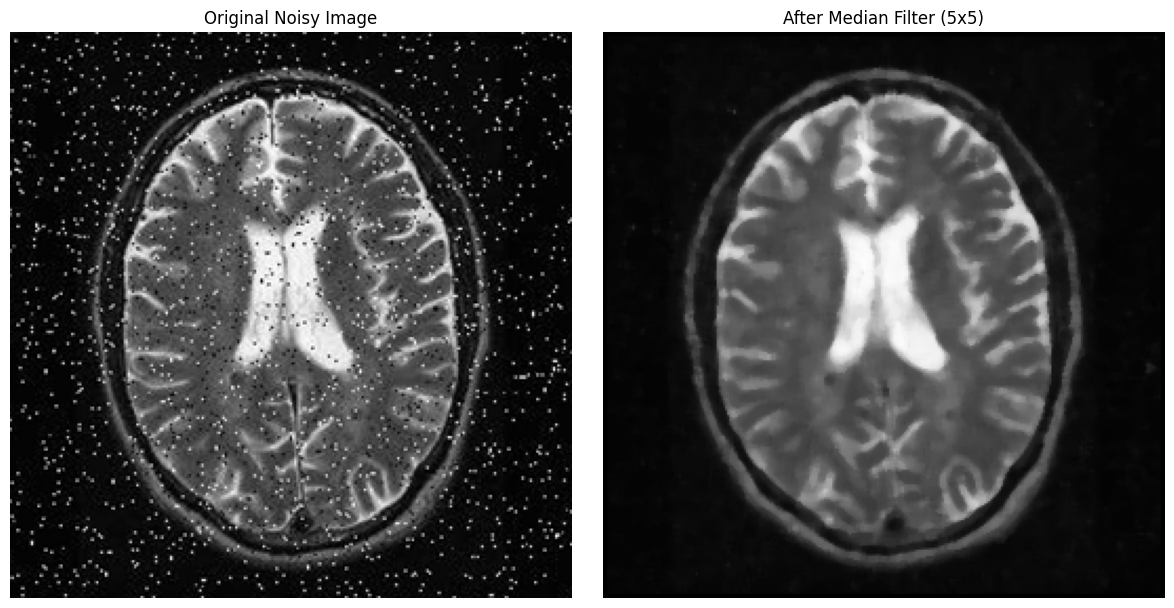

In [5]:
"""
    Main execution block:
    Loads a noisy image
    Applies a 5x5 median filter
    Displays the original and filtered images
    """
if __name__ == "__main__":
    image_path = "./input.png" 
    input_image = load_image(image_path) # Load and convert image to grayscale
    filtered_image = median_filter(input_image, kernel_size=5)
    display_images(input_image, filtered_image)

In [6]:
# Analysis: This code manually applies a median filter to remove salt-and-pepper noise while preserving edges. It is simple, flexible, and educational but may be slow on large images and ignores border pixels.